In [1]:
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
train_data = pd.read_csv('olid-training-v1.0.tsv', delimiter='\t', encoding='utf-8')
train_tweets = train_data[['tweet']]
train_task_a_labels = train_data[['subtask_a']]
train_task_b_labels = train_data[['subtask_b']]
train_task_c_labels = train_data[['subtask_c']]
train_task_a_labels.columns.values[0] = 'class_a'
train_task_b_labels.columns.values[0] = 'class_b'
train_task_c_labels.columns.values[0] = 'class_c'

In [3]:
def clean_tweets(df):
    punctuations = string.punctuation
    df.loc[:, 'tweet'] = df.tweet.str.replace('@USER', '')
    df.loc[:, 'tweet'] = df.tweet.str.replace('URL', '')
    df.loc[:, 'tweet'] = df.tweet.str.replace('&amp', 'and')
    df.loc[:, 'tweet'] = df.tweet.str.replace('&lt','')
    df.loc[:, 'tweet'] = df.tweet.str.replace('&gt','')
    df.loc[:, 'tweet'] = df.tweet.str.replace('\d+','')
    df.loc[:, 'tweet'] = df.tweet.str.lower()

    for punctuation in punctuations:
        df.loc[:, 'tweet'] = df.tweet.str.replace(punctuation, '')

    df.loc[:, 'tweet'] = df.astype(str).apply(
        lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')
    )
    df.loc[:, 'tweet'] = df.tweet.str.strip()

In [4]:
clean_tweets(train_tweets)

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_13684\3372182341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'tweet'] = df.tweet.str.replace('@USER', '')
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_13684\3372182341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'tweet'] = df.tweet.str.replace('URL', '')
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_13684\3372182341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [5]:
train_task_a_data = train_tweets.join(train_task_a_labels)

train_task_b_data = train_tweets.join(train_task_b_labels)
train_task_b_data = train_task_b_data.dropna() #Drop records with missing values

train_task_c_data = train_tweets.join(train_task_c_labels)
train_task_c_data = train_task_c_data.dropna() #Drop records with missing values

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data into train and test sets
train_a, test_a, labels_a_train, labels_a_test = train_test_split(
    train_task_a_data['tweet'], train_task_a_data['class_a'], test_size=0.2, random_state=42
)

train_b, test_b, labels_b_train, labels_b_test = train_test_split(
    train_task_b_data['tweet'], train_task_b_data['class_b'], test_size=0.2, random_state=42
)

train_c, test_c, labels_c_train, labels_c_test = train_test_split(
    train_task_c_data['tweet'], train_task_c_data['class_c'], test_size=0.2, random_state=42
)

In [7]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
train_a_vectors = vectorizer.fit_transform(train_a)
test_a_vectors = vectorizer.transform(test_a)

train_b_vectors = vectorizer.fit_transform(train_b)
test_b_vectors = vectorizer.transform(test_b)

train_c_vectors = vectorizer.fit_transform(train_c)
test_c_vectors = vectorizer.transform(test_c)

In [8]:
# Train SVM models
svm_a = SVC()
svm_a.fit(train_a_vectors, labels_a_train)

svm_b = SVC()
svm_b.fit(train_b_vectors, labels_b_train)

svm_c = SVC()
svm_c.fit(train_c_vectors, labels_c_train)

SVC()

In [9]:
# Make predictions
pred_a = svm_a.predict(test_a_vectors)
pred_b = svm_b.predict(test_b_vectors)
pred_c = svm_c.predict(test_c_vectors)

In [10]:
# Generate classification reports
report_a = classification_report(labels_a_test, pred_a)
report_b = classification_report(labels_b_test, pred_b)
report_c = classification_report(labels_c_test, pred_c)

c:\Users\Dinesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dinesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dinesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
print("Classification Report - Subtask A (Offensive Language Identification):\n", report_a)
print("Classification Report - Subtask B (Automatic Categorization of Offense Types):\n", report_b)
print("Classification Report - Subtask C (Offense Target Identification):\n", report_c)

Classification Report - Subtask A (Offensive Language Identification):
               precision    recall  f1-score   support

         NOT       0.73      0.97      0.84      1733
         OFF       0.85      0.34      0.48       915

    accuracy                           0.75      2648
   macro avg       0.79      0.65      0.66      2648
weighted avg       0.78      0.75      0.71      2648

Classification Report - Subtask B (Automatic Categorization of Offense Types):
               precision    recall  f1-score   support

         TIN       0.87      1.00      0.93       768
         UNT       1.00      0.02      0.04       112

    accuracy                           0.88       880
   macro avg       0.94      0.51      0.48       880
weighted avg       0.89      0.88      0.82       880

Classification Report - Subtask C (Offense Target Identification):
               precision    recall  f1-score   support

         GRP       0.60      0.48      0.53       202
         IND     

In [12]:
# Calculate confusion matrices
confusion_mat_a = confusion_matrix(labels_a_test, pred_a)
confusion_mat_b = confusion_matrix(labels_b_test, pred_b)
confusion_mat_c = confusion_matrix(labels_c_test, pred_c)

In [13]:
# Define class labels for visualization
class_labels_a = svm_a.classes_
class_labels_b = svm_b.classes_
class_labels_c = svm_c.classes_

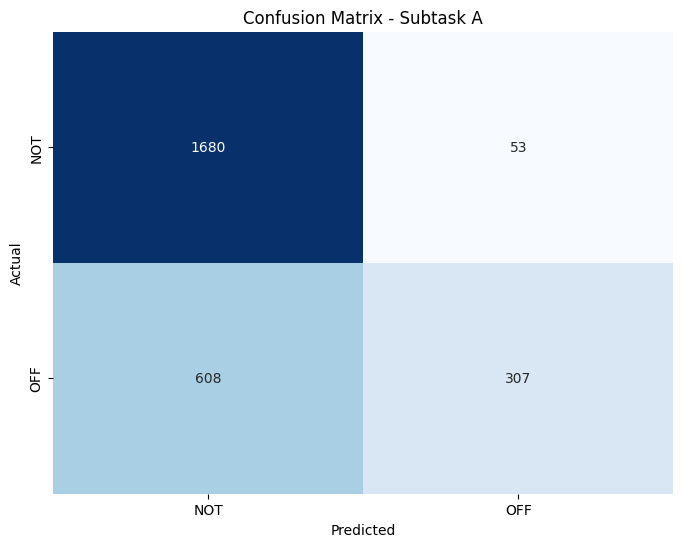

In [14]:
# Plot confusion matrix for Subtask A
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_a, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels_a,
            yticklabels=class_labels_a)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Subtask A')
plt.show()

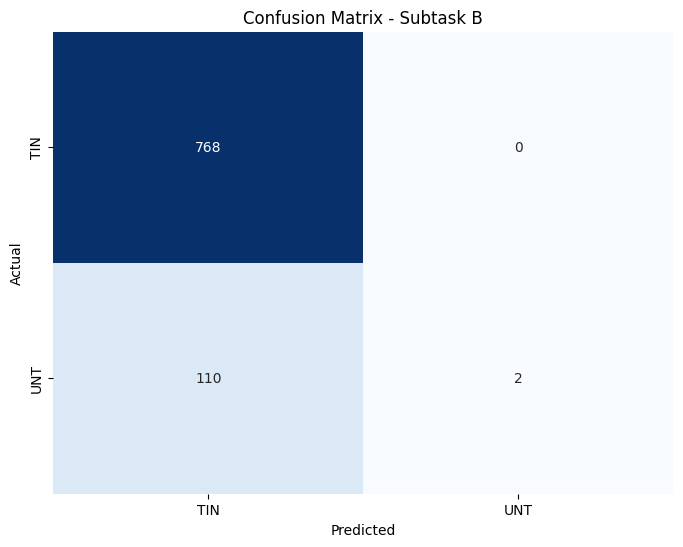

In [15]:
# Plot confusion matrix for Subtask B
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_b, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels_b,
            yticklabels=class_labels_b)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Subtask B')
plt.show()

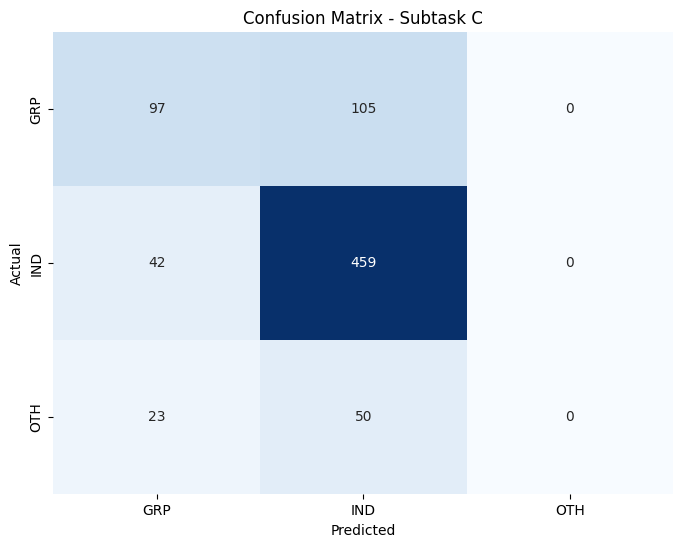

In [16]:
# Plot confusion matrix for Subtask C
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_c, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels_c,
            yticklabels=class_labels_c)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Subtask C')
plt.show()